# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from scipy.cluster.hierarchy import dendrogram, linkage
from mlxtend.frequent_patterns import apriori

# Data Cleaning, Transformation

In [2]:
df = pd.read_csv("healthcare_dataset.csv")

In [3]:
# Check for Missing Values
df.dropna(inplace=True)

# Data Types
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Handle Categorical Variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Admission Type'] = le.fit_transform(df['Admission Type'])
df['Test Results'] = le.fit_transform(df['Test Results'])

# Drop unnecessary column
columns_to_drop = ['Name', 'Date of Admission', 'Discharge Date', 'Doctor', 'Hospital', 'Insurance Provider','Billing Amount', 'Room Number', 'Admission Type']
df = df.drop(columns=columns_to_drop, axis=1)
display(df)

,Age,Gender,Blood Type,Medical Condition,Medication,Test Results
0,81,0,O-,Diabetes,Aspirin,1
1,35,1,O+,Asthma,Lipitor,2
2,61,1,B-,Obesity,Lipitor,2
3,49,1,B-,Asthma,Penicillin,0
4,51,1,O-,Arthritis,Paracetamol,2
...,...,...,...,...,...,...
9995,83,1,A+,Obesity,Ibuprofen,0
9996,47,0,AB+,Arthritis,Ibuprofen,2
9997,54,1,B-,Arthritis,Ibuprofen,2
9998,84,1,A+,Arthritis,Penicillin,2


# Visualization (EDA)

                Age        Gender  Test Results
count  10000.000000  10000.000000  10000.000000
mean      51.452200      0.492500      0.981100
std       19.588974      0.499969      0.819762
min       18.000000      0.000000      0.000000
25%       35.000000      0.000000      0.000000
50%       52.000000      0.000000      1.000000
75%       68.000000      1.000000      2.000000
max       85.000000      1.000000      2.000000


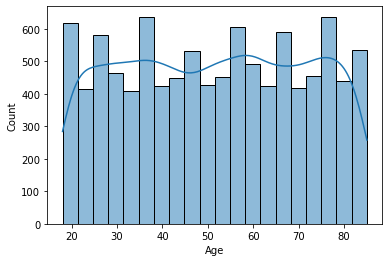

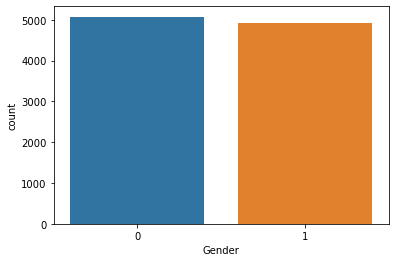

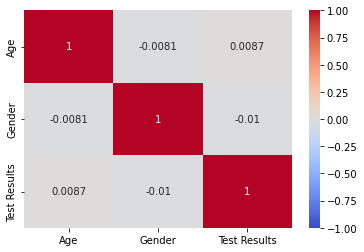

In [4]:
print(df.describe())

# Distribution Plots
sns.histplot(df['Age'], bins=20, kde=True)
plt.show()

sns.countplot(x='Gender', data=df)
plt.show()

# Correlation Analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

#  machine learning techniques

In [5]:
# Regression Task predict Medication
X_reg = df.drop(['Medication'], axis=1)
y_reg = df['Medication']

# Encode categorical variable 'Medication' using LabelEncoder
label_encoder = LabelEncoder()
y_reg_encoded = label_encoder.fit_transform(y_reg)

# Split the data
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg_encoded, test_size=0.2, random_state=42)

# Perform one-hot encoding for categorical variables in X_reg
categorical_cols = ['Blood Type', 'Medical Condition']
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_reg_train_encoded = pd.get_dummies(X_reg_train, columns=categorical_cols)
X_reg_test_encoded = pd.get_dummies(X_reg_test, columns=categorical_cols)

# Fit linear regression model
reg_model = LinearRegression()
reg_model.fit(X_reg_train_encoded, y_reg_train)

# Make predictions
reg_preds = reg_model.predict(X_reg_test_encoded)

# Evaluate the model
from sklearn.metrics import r2_score

reg_r2 = r2_score(y_reg_test, reg_preds)
print(f'Regression R-squared: {reg_r2}')

# Classification Task classificate test result
X_class = pd.get_dummies(df.drop(['Test Results'], axis=1)) 
y_class = df['Test Results']
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

class_model = RandomForestClassifier()
class_model.fit(X_class_train, y_class_train)
class_preds = class_model.predict(X_class_test)
class_accuracy = accuracy_score(y_class_test, class_preds)
class_precision = precision_score(y_class_test, class_preds, average='weighted')
class_recall = recall_score(y_class_test, class_preds, average='weighted')

print(f'Classification Accuracy: {class_accuracy}')
print(f'Classification Precision: {class_precision}')
print(f'Classification Recall: {class_recall}')

# Clustering Task
from sklearn.cluster import AgglomerativeClustering

scaled_df_hie = StandardScaler().fit_transform(df[['Age', 'Test Results']])

clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_labels = clustering.fit_predict(scaled_df_hie)

df['Cluster'] = cluster_labels

# Numeric and categorical columns need to be adjusted based on your actual dataset
numeric_cols = df.select_dtypes(include=[int, float]).columns
categorical_cols = df.select_dtypes(include=[object]).columns

# Add mode calculation for categorical columns within each cluster
from scipy.stats import mode
cluster_stats = df.groupby("Cluster").agg({
    "Age": "mean",
    "Gender": "mean",
    "Blood Type": lambda x: mode(x)[0][0],
    "Medical Condition": lambda x: mode(x)[0][0],
    "Medication": lambda x: mode(x)[0][0],
    "Test Results": "mean",
    "Cluster": "count"
})

# Rename columns for clarity
cluster_stats.columns = [
    "Mean Age", 
    "Mean Gender", 
    "Mode Blood Type", 
    "Mode Medical Condition", 
    "Mode Medication", 
    "Mean Test Results", 
    "Count"
]
display(cluster_stats)

Regression R-squared: -0.0007184728769331628
Classification Accuracy: 0.323
Classification Precision: 0.32348696897787454
Classification Recall: 0.323


,Mean Age,Mean Gender,Mode Blood Type,Mode Medical Condition,Mode Medication,Mean Test Results,Count
Cluster,,,,,,,
0,56.178413,0.484317,A+,Cancer,Penicillin,1.602768,5420
1,31.247404,0.510015,O+,Hypertension,Lipitor,0.416914,2696
2,66.768577,0.490977,AB-,Asthma,Penicillin,0.000000,1884


In [ ]:
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# One-hot encode categorical columns
X_reg_train_encoded = pd.get_dummies(X_reg_train, columns=['Blood Type', 'Medical Condition'])
X_reg_test_encoded = pd.get_dummies(X_reg_test, columns=['Blood Type', 'Medical Condition'])

# XGBoost Regression
xgb_reg_model = xgb.XGBRegressor()
xgb_reg_model.fit(X_reg_train_encoded, y_reg_train) 
xgb_reg_preds = xgb_reg_model.predict(X_reg_test_encoded)
xgb_reg_mse = mean_squared_error(y_reg_test, xgb_reg_preds)
print(f'XGBoost Regression Mean Squared Error: {xgb_reg_mse}')

# XGBoost Classification
xgb_class_model = xgb.XGBClassifier()
xgb_class_model.fit(X_class_train, y_class_train)
xgb_class_preds = xgb_class_model.predict(X_class_test)
xgb_class_accuracy = accuracy_score(y_class_test, xgb_class_preds)
print(f'XGBoost Classification Accuracy: {xgb_class_accuracy}')

# KNN Classification
knn_model = KNeighborsClassifier()
knn_model.fit(X_class_train, y_class_train)
knn_preds = knn_model.predict(X_class_test)
knn_accuracy = accuracy_score(y_class_test, knn_preds)
print(f'KNN Classification Accuracy: {knn_accuracy}')

# Hierarchical Clustering
df_encoded = pd.get_dummies(df, columns=['Blood Type', 'Medical Condition', 'Medication'])

# Standardize numeric columns
numeric_cols = df.select_dtypes(include=[int, float]).columns
df_encoded[numeric_cols] = StandardScaler().fit_transform(df_encoded[numeric_cols])

# Hierarchical Clustering
hc_cluster = linkage(df_encoded, method='ward')
dendrogram(hc_cluster)
plt.show()

# Apriori Algorithm
from mlxtend.frequent_patterns import apriori, association_rules

df_apriori = df[['Medication']]
df_apriori['Medication'] = df_apriori['Medication'].astype(str).str.strip()

# Convert to one-hot encoding
df_apriori_encoded = pd.get_dummies(df_apriori['Medication'])

# Run Apriori algorithm
frequent_itemsets = apriori(df_apriori_encoded, min_support=0.2, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)

# Generate association rules with confidence >= 0.6
rules_confidence_06 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print("\nAssociation Rules with Confidence >= 0.6:")
print(rules_confidence_06)

XGBoost Regression Mean Squared Error: 2.3693714255131106
XGBoost Classification Accuracy: 0.351
KNN Classification Accuracy: 0.3385
